In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
def clouds_single_axis(cloud_no=2, n=1200, stretch=0.5, split_dist=10):
    # generate n random points
    x = np.random.randn(n)
    # divide into number of arrays representing each cloud
    x = [x[i:i + int(n/cloud_no)] for i in range(0, n, int(n/cloud_no))]
    # transform arrays so that clouds are distinct
    x = np.matmul(np.diag(((np.random.randint(2, size=cloud_no)*2)-1)*stretch), x)
    x = np.array([x[i] + ((np.repeat(np.random.rand(1), int(n/cloud_no))*2)-1)*split_dist for i in range(0, cloud_no)])
    return(np.squeeze(x.reshape((1,n))))

def clouds_multi_axis(cloud_no=2, naxs=3, n=1200, stretch_par=[1, 1, 1], dist_par=[5, 5, 5]):
    # define a permutation for the generated axis
    arr = np.random.permutation(range(0, n))
    # extract each axis and apply permutation
    output = []
    for i in range(0, naxs):
        gen = clouds_single_axis(cloud_no=cloud_no, n=n,
                                        stretch=stretch_par[i],
                                        split_dist=dist_par[i])
        output.append(gen[arr])
    return(np.array(output))

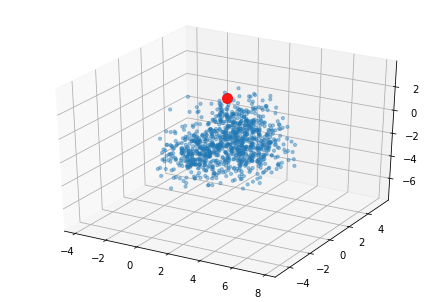

In [10]:
t = clouds_multi_axis(cloud_no=3, n=12000)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(t[0][:1000], t[1][:1000], t[2][:1000], alpha=0.4, s=10)
ax.scatter(np.mean(t[0]), np.mean(t[1]), np.mean([2]), color='red', s=100, alpha=0.9)

In [4]:
X = np.array(t).T

In [5]:
f = open("cloud_default_test.csv", "w+")

In [6]:
X = pd.DataFrame(X, columns=('x', 'y', 'z'))

In [7]:
X.to_csv("cloud_default_test.csv", index=False)

In [8]:
f.close()